In [87]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from google.colab import files

In [35]:
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = '/content/drive/MyDrive/ML-DeepLearning/ML_Florindo/PROJETO_1'

file = r'/content/drive/MyDrive/ML-DeepLearning/ML_Florindo/PROJETO_1/imageMNIST.csv'
digits = pd.read_csv(file, header=None)

print(digits.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(5000, 400)


In [65]:
file = r'/content/drive/MyDrive/ML-DeepLearning/ML_Florindo/PROJETO_1/labelMNIST.csv'
labels = pd.read_csv(file, header=None)

print(labels.shape)

(5000, 1)


In [80]:
 dig = np.array(digits) # transforma dados em matriz
 lab = np.array(labels) # transforma dados em matriz

# separando dados de treino (80%) e dados de teste (20%): 
dig_train, dig_test, lab_train, lab_test = train_test_split(dig, lab, test_size=0.20)

print("Dados de treino: ", dig_train.shape)
print("Dados de teste: ", dig_test.shape)

Dados de treino:  (4000, 400)
Dados de teste:  (1000, 400)


In [81]:
# função sigmoide 

def g(z):
  x = 1/(1+np.exp(-z))
  return x

In [82]:
# função de custo regularizada

def funcCustoReg(X,y,theta, Lambda):
  m = len(y)
  h = g(np.dot(X, theta)) # imagem da sigmoide por X*theta
  L = np.sum(y*np.log(h) + (1-y)*np.log(1-h))
  J = (-1/m)*L + np.dot((Lambda/(2*m)),np.sum(theta**2))
  return J

In [83]:
# há 10 classes (dígios de 0 a 9)

r = lab_train.shape
Y=np.zeros([r[0],10])
for i in range(r[0]):
    for j in range(10):
        if lab_train[i]==j+1:
            Y[i][j]=1
        else:
            Y[i][j]=0

In [84]:
X=dig_train
maximo = 0
t=X.shape
m=t[0]
n=t[1]

for i in range(len(X[0])):
    minX=min(X[i])
    maxX=max(X[i])
    X[i] = (X[i]-minX)/(maxX-minX)

THETA=np.zeros([n,10])

alpha = 1
Lambda = 0.1
M_reg = np.zeros([n]) # matriz com valores regularizadores

for i in range(n):
  if i == 0:
    M_reg[i] = 1
  else:
    M_reg[i] = 1-alpha*(Lambda/m)

for k in range(10):
    y=Y[:,k]
    theta=np.zeros([n])

    for i in range(300):
        O = theta - (alpha/m)*(X.T@(g(X@theta) - y))
        theta=O
    print("Função de Custo Regularizada: ",funcCustoReg(X,y,theta, Lambda))
    
    THETA[:,k]=theta

Função de Custo Regularizada:  0.03248539545339114
Função de Custo Regularizada:  0.08766818860034667
Função de Custo Regularizada:  0.0930442854133106
Função de Custo Regularizada:  0.06328725515141759
Função de Custo Regularizada:  0.0891312334798801
Função de Custo Regularizada:  0.04366843591351473
Função de Custo Regularizada:  0.059436226465899994
Função de Custo Regularizada:  0.14854090801386466
Função de Custo Regularizada:  0.1172727327459533
Função de Custo Regularizada:  0.03202619889357487


In [85]:
R = g(np.dot(dig_test, THETA)) # calculando sigmoide

r1=lab_test.shape
Classificacao=np.zeros([r1[0],1])

for i in range(r1[0]):
    Classificacao[i]=np.argmax(R[i])+1
    
resultado=Classificacao-lab_test
cont=0
Real=[]
ClassificouErrado=[]
for i in range(r1[0]):
    if resultado[i]==0:
        cont=cont+1
    else:
        ClassificouErrado.append(Classificacao[i])
        Real.append(lab_test[i])
score=(cont*100)/r1[0]
print("Porcentagem de acerto: ",score)

Porcentagem de acerto:  90.6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

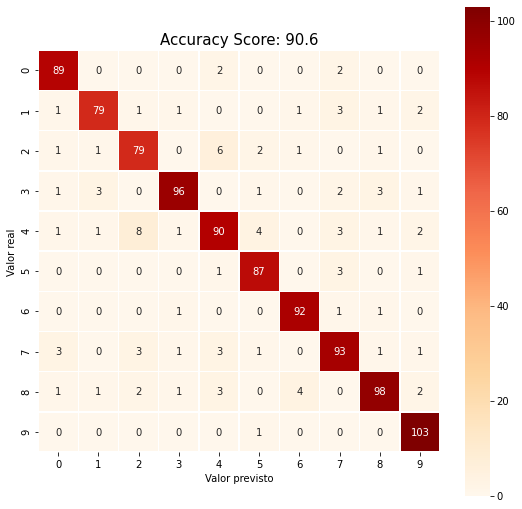

In [88]:
cmatrix=confusion_matrix(lab_test, Classificacao)

plt.figure(figsize=(9,9))
sns.heatmap(cmatrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'OrRd');
plt.ylabel('Valor real');
plt.xlabel('Valor previsto');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

plt.savefig("figura15.png",dpi=300)
files.download('figura15.png')